# Loan Default Modeling for Lending Club

Capstone MVP (Minimum Viable Product)

Note to vistors: This is intended for academic purposes.

Please note, this is a Machine Learning Classification project using Lending Club datasets.

Datasets were sourced via Kaggle:

https://www.kaggle.com/wordsforthewise/lending-club


https://www.kaggle.com/ethon0426/lending-club-20072020q1

## Business Interest

The client (Lending Club) wants to capture applicants that would be able to repay the loan and also identify potentially high-risk borrowers that are likely to default. In turn, the client wants to reduce the potential loss of business of applicants that are likely to not default and identifying applicants that are likely to default.

This is key to the business interests of the client:

(1) They do not want to miss-classify prospective applicants during their pre-screening process

(2) Manage their operational risk appetite by classifying potential applicants that could be considered at risk of defaulting down the line.

# Notebook Overview, NB3_Data_Wrangling_EDA1

This Notebook was created after the inital reduction of our original two million observation. Due to low memory issues and limited processing power, we went from two million observation within 151 variables to 246268 observations with 37 features. 

This Notebook:

* Univariant analysis of categorical and numerical features.


* Lite Data Clensing and Data Wrangling


* Updating the asset (dataset) for preparation for the second notebook which will focus on Bivariant EDA with resepct to our response variable, Preprocessing, and Modeling, and Post Modeling Analysis

# Loading Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', 200, 'display.max_columns', 200)

%config Completer.use_jedi = False

# Data Loading

In [2]:
# Creating a pandas dataframe to work with. 
# Also, including low_memory option to mitigate the taxing computational resources

Working_DF = pd.read_csv('clean_accepted_2.csv', low_memory=True)

## Data Wrangling 

In [3]:
# Sanity checking the Working_DF

Working_DF.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,recoveries,application_type,tot_cur_bal,bc_util,mort_acc,pub_rec_bankruptcies,tax_liens
0,103215536,25000.0,36 months,17.99,903.69,D,D2,Compliance Manager,1 year,MORTGAGE,67500.0,Source Verified,Mar-2017,Charged Off,n,debt_consolidation,Debt consolidation,750xx,TX,19.41,Oct-1995,660.0,664.0,1.0,25.0,0.0,43658.0,56.3,54.0,f,2298.61,Individual,173292.0,39.4,2.0,0.0,0.0
1,51105809,10000.0,36 months,11.53,329.91,B,B5,customer service,3 years,RENT,45000.0,Not Verified,Jun-2015,Fully Paid,n,debt_consolidation,Debt consolidation,982xx,WA,29.23,Sep-2003,680.0,684.0,0.0,20.0,0.0,7459.0,58.3,28.0,f,0.00,Individual,62916.0,71.0,0.0,0.0,0.0
2,6728064,6950.0,36 months,15.88,243.93,C,C4,"Hanson Construction Company, Inc",3 years,RENT,41810.0,Verified,Sep-2013,Fully Paid,n,debt_consolidation,Visa Free,986xx,WA,17.25,Aug-1988,665.0,669.0,3.0,6.0,1.0,10723.0,58.0,43.0,f,0.00,Individual,197096.0,98.4,2.0,1.0,0.0
3,59229385,24000.0,60 months,12.69,542.28,C,C2,Senior Consultant,3 years,MORTGAGE,100000.0,Not Verified,Sep-2015,Fully Paid,n,debt_consolidation,Debt consolidation,850xx,AZ,22.22,Sep-1996,695.0,699.0,0.0,9.0,0.0,22654.0,89.2,22.0,w,0.00,Individual,281268.0,89.2,2.0,0.0,0.0
4,10735811,15000.0,60 months,24.99,440.19,F,F4,sales,10+ years,MORTGAGE,65000.0,Verified,Jan-2014,Fully Paid,n,debt_consolidation,Debt consolidation,027xx,MA,25.24,Jul-2003,665.0,669.0,0.0,16.0,0.0,9269.0,25.3,44.0,f,0.00,Individual,253377.0,27.2,2.0,0.0,0.0


In [4]:
# Checking info and dtypes

Working_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246269 entries, 0 to 246268
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    246269 non-null  int64  
 1   loan_amnt             246269 non-null  float64
 2   term                  246269 non-null  object 
 3   int_rate              246269 non-null  float64
 4   installment           246269 non-null  float64
 5   grade                 246269 non-null  object 
 6   sub_grade             246269 non-null  object 
 7   emp_title             246269 non-null  object 
 8   emp_length            246269 non-null  object 
 9   home_ownership        246269 non-null  object 
 10  annual_inc            246269 non-null  float64
 11  verification_status   246269 non-null  object 
 12  issue_d               246269 non-null  object 
 13  loan_status           246269 non-null  object 
 14  pymnt_plan            246269 non-null  object 
 15  

* No null values and we have over 246k observations.

* Also we can see some of the dtypes will require some formating to the correct dtypes, which will be done during the preprocess analysis and data clensing portion.

In [5]:
# checking the unique values of the id 

Working_DF.id.nunique()

246269

* Above we can see that IDs are unique and correspond to the number of observations.

* During the exploratory data analysis (EDA) portion I will go further and determine if the ID will be necessary for pre-processing. 

In [6]:
# checking for any missing values

missing_percent = Working_DF.isna().mean().sort_values(ascending = False).round(4) * 100
print(missing_percent)

id                      0.0
dti                     0.0
fico_range_low          0.0
fico_range_high         0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
recoveries              0.0
application_type        0.0
tot_cur_bal             0.0
bc_util                 0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
earliest_cr_line        0.0
addr_state              0.0
loan_amnt               0.0
zip_code                0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
pymnt_plan              0.0
purpose                 0.0
title               

* Above shows a good indicator of the percentage of potential missing values found within our current asset (dataset). 

* As we can see there are no missing values, however, we will do some data minipulation and additional clensing in the next section.

# Validity (In-depth Sanity) Checking, Lite Data Clensing, Univariant Analysis (Lite EDA)

To be more efficient and create a more manageable we will divide this section into two validity sections: discrete and continous.


## Discrete Variables Validity Checks

In [7]:
# Creating a working variable for discrete variables (categorical)

categorical = Working_DF.select_dtypes('object')
categorical.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
count,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269
unique,2,7,35,94194,11,6,3,77,2,1,13,10039,898,51,662,2,2
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2001,w,Individual
freq,183412,71260,15641,4419,86809,126956,102862,8711,197386,246269,145597,129904,2914,34771,1901,150365,241649


In [8]:
# pulling up the info list for reference

categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246269 entries, 0 to 246268
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 246269 non-null  object
 1   grade                246269 non-null  object
 2   sub_grade            246269 non-null  object
 3   emp_title            246269 non-null  object
 4   emp_length           246269 non-null  object
 5   home_ownership       246269 non-null  object
 6   verification_status  246269 non-null  object
 7   issue_d              246269 non-null  object
 8   loan_status          246269 non-null  object
 9   pymnt_plan           246269 non-null  object
 10  purpose              246269 non-null  object
 11  title                246269 non-null  object
 12  zip_code             246269 non-null  object
 13  addr_state           246269 non-null  object
 14  earliest_cr_line     246269 non-null  object
 15  initial_list_status  246269 non-nu

#### Helper function for discrete variables (categorical)

In [95]:
# Creating a function to call for quick visualization of categorical features within the asset


def cat_count(col_name, full_name):
    """
    This function will help to plot a bar countplot for categorical variables.
    - col_name: variable name within our asset.
    - full_name: the variable name that one would use for the title
    """
    
    # value counts
    print(categorical[col_name].value_counts());
    
    # Visualize 
    sns.countplot(x = col_name , data = Working_DF).set_title('Demographic of ' + full_name)
    plt.xticks(rotation=90, horizontalalignment='center')
    plt.figure(figsize=(10,5))
    plt.show();
    
    # Descriptive stats
    print(Working_DF[col_name].describe())

### Term

The "term" feature based on the data dictionary: The number of payments on the loan. Values are in months and can be either 36 (three years) or 60 (five years). 

 36 months    183412
 60 months     62857
Name: term, dtype: int64


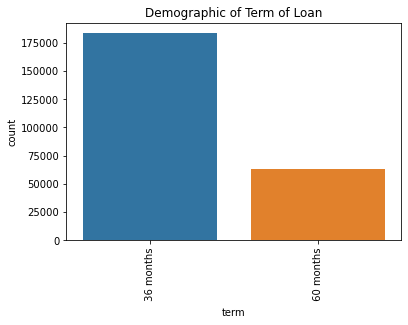

<Figure size 720x360 with 0 Axes>

count         246269
unique             2
top        36 months
freq          183412
Name: term, dtype: object


In [96]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count('term', 'Term of Loan')

* Based on the value_counts and visual we can see that most clients have choosen to work with a 36 months (three year) term. 

### Grade and Sub-grade

Per the data dictionary:

* grade: Lending CLub's assigned loan grade

* sub_grade: Lending Club's assigned sub-grade

Based on prior knowledge grade and sub-grade are based on the FICO credit score of the customer. The lower the grade, the higher the risk for investors. We will explore them both to see if this variable(s) will be necessary for pre-processing

C    71260
B    70655
A    40986
D    37609
E    17701
F     6273
G     1785
Name: grade, dtype: int64


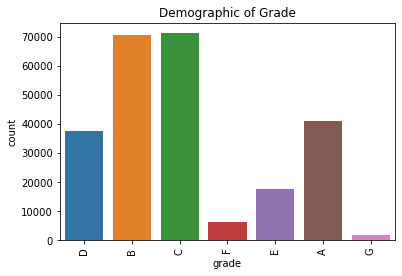

<Figure size 720x360 with 0 Axes>

count     246269
unique         7
top            C
freq       71260
Name: grade, dtype: object


In [94]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count('grade', 'Grade')

Key Points:

* We can see that grade "C" and "B" both have over 140k ovservations

* So far 'grade' has shown some interesting results based in regard to curent population sample

C1    15641
B4    15210
B5    15114
C2    14544
B3    14397
C3    14190
C4    13998
B2    13172
C5    12887
B1    12762
A5    11415
D1     9674
A4     9148
D2     8253
A1     7369
D3     7290
D4     6651
A3     6620
A2     6434
D5     5741
E1     4474
E2     4005
E3     3389
E4     3024
E5     2809
F1     1869
F2     1443
F3     1198
F4      970
F5      793
G1      583
G2      412
G3      322
G4      246
G5      222
Name: sub_grade, dtype: int64


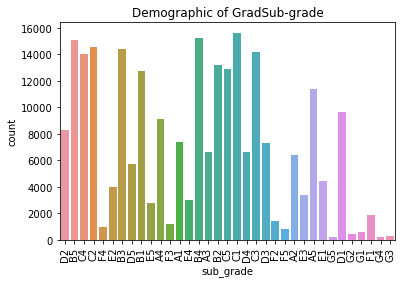

count     246269
unique        35
top           C1
freq       15641
Name: sub_grade, dtype: object


In [12]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count('sub_grade', 'GradSub-grade')

Key Point:

* Taking into account in respect to 'grade' we can see that even in the sub-grade, "B" and "C" show a much larger distribution. 

Consideration(s):

* We will get more in-depth when we explore this variable during full EDA and univariant analysis

### Employment Title and Employment Length

In this section we will take a gander at both: emp_title and emp_length

* emp_title: The job title supplied by the Borrower when applying for the loan.

* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

This will be quite interesting to explore as emp_length could be continious. Moreover, emp_title will give us a lay of the land to understand the employment/industry demographics of Lending Club's borrowers

In [13]:
# checking unique values found within emp_title

categorical.emp_title.value_counts()

Teacher                         4419
Manager                         4037
Owner                           2078
Registered Nurse                1857
RN                              1838
                                ... 
Quality Assurance Superviser       1
Fiscal Tech 2                      1
Specialisy                         1
skilled assembler                  1
Ofac                               1
Name: emp_title, Length: 94194, dtype: int64

In [14]:
# let's list all the emp_title

employ_titles = categorical.emp_title.value_counts()

print(employ_titles)

Teacher                         4419
Manager                         4037
Owner                           2078
Registered Nurse                1857
RN                              1838
                                ... 
Quality Assurance Superviser       1
Fiscal Tech 2                      1
Specialisy                         1
skilled assembler                  1
Ofac                               1
Name: emp_title, Length: 94194, dtype: int64


In [15]:
# Checking the shape of employment titles

employ_titles.shape

(94194,)

In [16]:
# Summary stats for emp_title

Working_DF.emp_title.describe()

count      246269
unique      94194
top       Teacher
freq         4419
Name: emp_title, dtype: object

Key Points: 

* As we can see there are too many unique employment titles, over 90k.

* The top employment titles are: Teacher, Manager, Owner, Registered Nurse (RN) 

Consideration(s): 

* With over 90k unique values there are too many titles for this to be useful--so we will likely drop this after checking emp_length

10+ years    86809
2 years      23561
3 years      20842
< 1 year     20563
1 year       16968
5 years      16172
4 years      15436
8 years      12009
6 years      11974
7 years      11645
9 years      10290
Name: emp_length, dtype: int64


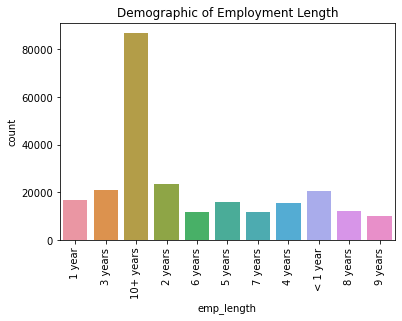

count        246269
unique           11
top       10+ years
freq          86809
Name: emp_length, dtype: object


In [17]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count('emp_length', 'Employment Length')

In [18]:
# No missing values, but wanted to check the len for sanity checking purposes

len(categorical.emp_length)

246269

Key Point(s): 

* The Lending CLub data dictionary description for emp_length does not match.

* We have 11 unique values within the feature.

* Top value is 10+ years of employment. This is good to know, so we can see the distribution to our response (target) variable during the univariant analysis.

Consideration(s):

* Binning employment lengths to four classes: < 1 to 0 years 

or

* Removing the 'years' string


* Per our inital assumption employment length, we will convert this variable into numerical

#### Data Cleaning: Employment title and Employment Length

In [19]:
# Removing Employment title from our asset (dataset)

Working_DF.drop(labels='emp_title', axis=1, inplace=True)


In [20]:
# sanity check emp_title was removed 

Working_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246269 entries, 0 to 246268
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    246269 non-null  int64  
 1   loan_amnt             246269 non-null  float64
 2   term                  246269 non-null  object 
 3   int_rate              246269 non-null  float64
 4   installment           246269 non-null  float64
 5   grade                 246269 non-null  object 
 6   sub_grade             246269 non-null  object 
 7   emp_length            246269 non-null  object 
 8   home_ownership        246269 non-null  object 
 9   annual_inc            246269 non-null  float64
 10  verification_status   246269 non-null  object 
 11  issue_d               246269 non-null  object 
 12  loan_status           246269 non-null  object 
 13  pymnt_plan            246269 non-null  object 
 14  purpose               246269 non-null  object 
 15  

In [21]:
# Reference for replacing emp_length
Working_DF['emp_length'].value_counts(dropna=False).sort_index()

1 year       16968
10+ years    86809
2 years      23561
3 years      20842
4 years      15436
5 years      16172
6 years      11974
7 years      11645
8 years      12009
9 years      10290
< 1 year     20563
Name: emp_length, dtype: int64

In [22]:
# This is to address the emp_length 'year(s)' strings

zero_dict = {'10+ years':'10', 
            "< 1 year": '0',
            '2 years': '2',
            '3 years': '3',
            '4 years': '4',
            '5 years': '5',
            '6 years': '6',
            '7 years': '7',
            '8 years': '8',
            '9 years': '9',
            '1 year': '1'}

Working_DF['emp_length'] = Working_DF['emp_length'].replace(zero_dict)

In [23]:
# Sanity checking 
Working_DF['emp_length'].value_counts(dropna=False).sort_index()

0     20563
1     16968
10    86809
2     23561
3     20842
4     15436
5     16172
6     11974
7     11645
8     12009
9     10290
Name: emp_length, dtype: int64

In [24]:
# converting emp_legth, first string then into an int

Working_DF['emp_length'] = Working_DF['emp_length'].astype(str).astype(int)

### Home Ownership

We will explore the home ownership variable.

home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER



MORTGAGE    126956
RENT         94084
OWN          25156
ANY             53
OTHER           11
NONE             9
Name: home_ownership, dtype: int64


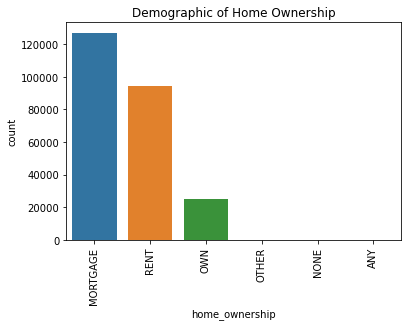

count       246269
unique           6
top       MORTGAGE
freq        126956
Name: home_ownership, dtype: object


In [26]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count('home_ownership', 'Home Ownership')

Key Points:

* Mortgage is the the highest in terms of home ownership status, which could be useful to see this relationship during the univariant analysis to our response variable.

* Rent and Own will also be interesting to see in respect to our response (target) variable. 

Consideration(s): 

* although Other, None, and Any are under 100 observation, these classes will nto be removed as it will be interesting to see it's relationship to our target. However, we will bin None and ANY to other

#### Data Clensing Home Ownership

In [27]:
# binning None and Any to Other

Working_DF['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

MORTGAGE    126956
RENT         94084
OWN          25156
ANY             53
OTHER           11
NONE             9
Name: home_ownership, dtype: int64


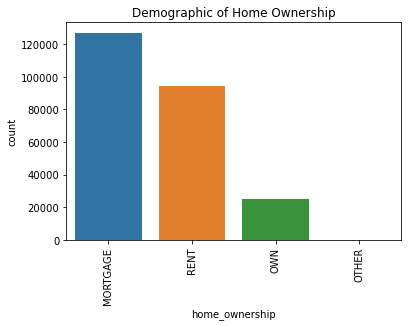

count       246269
unique           4
top       MORTGAGE
freq        126956
Name: home_ownership, dtype: object


In [28]:
cat_count('home_ownership', 'Home Ownership')

### Verfification Status

In this section we will explore the verification status variable.

* verification_status: Indicates if income was verified by Lending CLub, not verified, or if the income source was verified

This is important to understand how Lending Club pre-screening process of applicants, especially to see if potential loan candidates have any available funding. This also can be a qualitative view of how much risk a potential candidate could be from the onset prior to any transactional processing from the borrower. 

Source Verified    102862
Not Verified        73406
Verified            70001
Name: verification_status, dtype: int64


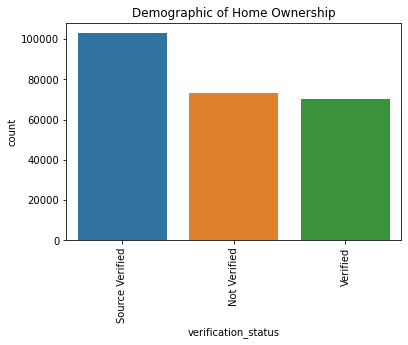

count              246269
unique                  3
top       Source Verified
freq               102862
Name: verification_status, dtype: object


In [30]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count('verification_status', 'Home Ownership')

Key Points:

* Per Source Verified and Verified, we can see that a majority of borrowers have been verified.

* In terms of Not Verified, I'd like to explore and see if their the distribution between between the response variable.

Consideration(s):

* Could possibly merge source verified and verified. This is will be considered post univariant analysis.


### Loan Issue Date

This section we will explore the issue_d (issue date of the loan).

* issue_d: The month which the loan was funded

One assumption prior to exploring this variable is that it should not be categorical but should be a date-time format. 

Mar-2016    8711
Oct-2015    7915
Jul-2015    7864
Dec-2015    7403
Oct-2014    7119
Jan-2015    6585
Nov-2015    6228
Apr-2015    6175
Feb-2016    6062
Aug-2015    6023
May-2015    5647
Jul-2014    5489
Jun-2015    5016
Jan-2016    4976
Sep-2015    4885
Nov-2014    4623
Mar-2015    4504
Apr-2016    4318
Feb-2015    4248
Jul-2016    4185
Aug-2016    4116
Jun-2016    3980
Oct-2016    3743
Dec-2016    3727
Aug-2014    3645
May-2014    3641
Apr-2014    3563
Nov-2016    3478
Sep-2016    3303
May-2016    3286
Mar-2017    3282
Jun-2014    3260
May-2017    3169
Jan-2017    3159
Mar-2014    3118
Jan-2014    3064
Aug-2017    3002
Nov-2013    2995
Jun-2017    2953
Dec-2013    2936
Feb-2014    2915
Jul-2017    2887
Oct-2013    2841
Feb-2017    2640
Sep-2013    2637
Sep-2017    2593
Apr-2017    2535
Aug-2013    2524
Jul-2013    2323
Oct-2017    2308
Nov-2017    2239
Jun-2013    2192
May-2013    2078
Sep-2014    2060
Apr-2013    1916
Dec-2017    1884
Dec-2014    1880
Mar-2013    1672
Jan-2018    16

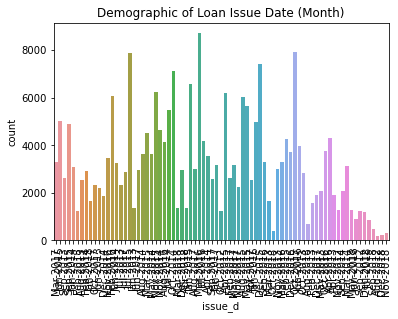

count       246269
unique          77
top       Mar-2016
freq          8711
Name: issue_d, dtype: object


In [31]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("issue_d", "Loan Issue Date (Month)")

Key Points:

* Interesting spread; however, at this point we just shows that more of how many points were issues during Month and Year.

Consideration(s):

* At this point i will leave it be until, we reach the preprocessing portion and I will consider either converting it to datetime or dropping the column.

### Payment Plan

This section will explore the viable Payment Plan.

* pymnt_plan: Indicates if a payment plan has been put in place for the loan

This can be considered if the borrowers has set a payment plan or a plan-of-action on how to pay back the loan.

n    246269
Name: pymnt_plan, dtype: int64


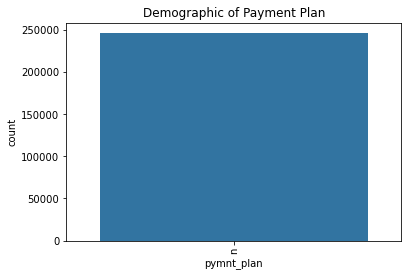

count     246269
unique         1
top            n
freq      246269
Name: pymnt_plan, dtype: object


In [32]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("pymnt_plan", "Payment Plan")

Key Point:

* All of the observations within the asset do not have a payment plan.

Consideration(s):

* Since all observations are not on a payment plan we will drop this from variable from our asset (dataset).

#### Data Clensing Payment Plan

In [33]:
# dropping pymnt_plan

Working_DF.drop(labels='pymnt_plan', axis=1, inplace=True)

In [34]:
# Sanity checking 
Working_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246269 entries, 0 to 246268
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    246269 non-null  int64  
 1   loan_amnt             246269 non-null  float64
 2   term                  246269 non-null  object 
 3   int_rate              246269 non-null  float64
 4   installment           246269 non-null  float64
 5   grade                 246269 non-null  object 
 6   sub_grade             246269 non-null  object 
 7   emp_length            246269 non-null  int64  
 8   home_ownership        246269 non-null  object 
 9   annual_inc            246269 non-null  float64
 10  verification_status   246269 non-null  object 
 11  issue_d               246269 non-null  object 
 12  loan_status           246269 non-null  object 
 13  purpose               246269 non-null  object 
 14  title                 246269 non-null  object 
 15  

### Purpose of the Loan

This section will explore the loan purpose.

* purpose: A category provided by the borrower for the loan request. 

This will be very helpful in understanding why applicants/candidates are opting for Lending Club's service

debt_consolidation    145597
credit_card            53371
home_improvement       16346
other                  13382
major_purchase          5160
medical                 2803
small_business          2399
car                     2390
vacation                1596
moving                  1557
house                   1360
wedding                  169
renewable_energy         139
Name: purpose, dtype: int64


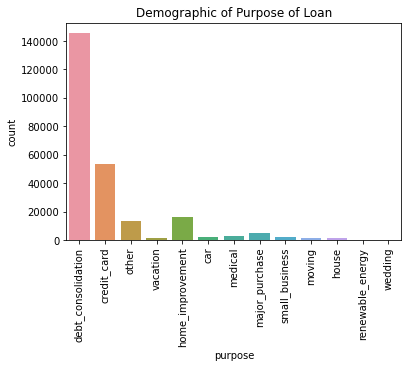

count                 246269
unique                    13
top       debt_consolidation
freq                  145597
Name: purpose, dtype: object


In [35]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("purpose", "Purpose of Loan")

Key Points:

* Debt Consolidation seems to be the prevaling purpose of loans

* This is really helpful in terms of understand the reason for applicants/candidates coming to Lending Club for their finanical needs.

* Having both Debt Consolidation and Credit Card shows that clients are trying to reduce their debt liability or are trying to mitigate potential APR or interest from various financial vehicles.

### Title of Loan (Investor named purpose)

This section will explore the title feature.

* title: The loan title provided by the borrower

We will take a gander to see if there is a difference between title and purpose. If there is not major difference we will then consider dropping on of features from the asset.

In [36]:
# Checking value count, Visual of variable distribution, and Discriptive Stats

#cat_count("title", "Title of Loan (Investor named purpose)")

###### Due to the amount of titles we will explore it this feature in manageable chunks

In [37]:
# Descriptive stats

Working_DF['title'].describe()

count                 246269
unique                 10039
top       Debt consolidation
freq                  129904
Name: title, dtype: object

* There are over 10k uninique values versus purpose which has only 13.

In [38]:
# for the purpose of looking at the top 10 titles

Working_DF['title'].value_counts().head(10)

Debt consolidation         129904
Credit card refinancing     47201
Home improvement            14874
Other                       12382
Major purchase               4728
Medical expenses             2617
Debt Consolidation           2353
Business                     2245
Car financing                2177
Vacation                     1511
Name: title, dtype: int64

Key Points:

* This seems to be a more detailed and robust categorization of loan purposes, however it is quite extensive and some repetitions. 

Consideration(s):

* Due tot the volume and repetitions this variable will be droped from the asset.

#### Data Clensing Title of Loan (Investor named purpose)

In [39]:
# Droping title from asset


Working_DF.drop('title', axis=1, inplace=True)

In [40]:
# Sanity check
Working_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246269 entries, 0 to 246268
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    246269 non-null  int64  
 1   loan_amnt             246269 non-null  float64
 2   term                  246269 non-null  object 
 3   int_rate              246269 non-null  float64
 4   installment           246269 non-null  float64
 5   grade                 246269 non-null  object 
 6   sub_grade             246269 non-null  object 
 7   emp_length            246269 non-null  int64  
 8   home_ownership        246269 non-null  object 
 9   annual_inc            246269 non-null  float64
 10  verification_status   246269 non-null  object 
 11  issue_d               246269 non-null  object 
 12  loan_status           246269 non-null  object 
 13  purpose               246269 non-null  object 
 14  zip_code              246269 non-null  object 
 15  

### Locational Variables, State Address and Zip Code

This section we will explore locational variables, state address and zip code.

* addr_state: The state (such as NJ, NY, MA) provided by the borrower in the loan application

* zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.

A few assumptions and initial considerations prior to validity check:

* State Address: this would be helpful to understand the lay of the land of Lending Club's customer demographic and also in respect to our response variable. In terms of modeling versus analysis.

* Zip Code: due to the potential three number of the zip this may prove to be not useful. Nonetheless, we will still explore to come to decision to keep this feature. 

CA    34771
TX    21177
NY    18769
FL    16857
IL     9917
NJ     8923
PA     8755
OH     8429
GA     7861
VA     6864
NC     6849
MI     6602
AZ     6048
MA     5664
MD     5620
WA     5479
CO     4865
MN     4527
IN     4364
MO     3988
TN     3934
NV     3744
CT     3606
WI     3451
AL     3086
LA     2888
OR     2855
SC     2781
KY     2507
OK     2353
KS     2175
AR     1880
UT     1845
NM     1326
NH     1246
MS     1239
HI     1201
RI     1091
WV      892
NE      689
DE      686
MT      678
AK      641
DC      569
WY      538
SD      520
VT      512
ME      381
ND      320
ID      305
IA        1
Name: addr_state, dtype: int64


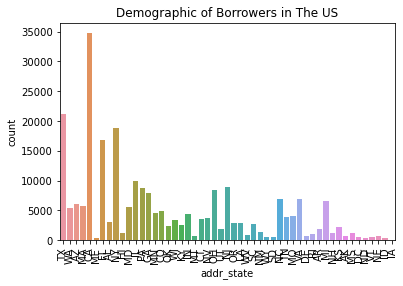

count     246269
unique        51
top           CA
freq       34771
Name: addr_state, dtype: object


In [41]:
# # Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("addr_state", "Borrowers in The US")

Key Points:

* We see the that CA, NY, FL, and TX have a large amount of borrowers.

Consideration(s):

* This gives us an idea of the distribution of borrowers within each state. 

* In terms of model usefullness, we will hold off from removing until we complete the univariant and bivariant analysis.


In [42]:
# Zip Code, I will check the unique values first

Working_DF.zip_code.nunique()

898

In [43]:
# checking a random sample 

Working_DF.zip_code.sample(10)

72810     080xx
60699     681xx
164105    802xx
202118    986xx
113447    025xx
228689    011xx
164568    801xx
103022    840xx
200281    700xx
77258     806xx
Name: zip_code, dtype: object

Key Points:

* At this point there are over 898 zip code and just showing the first three digits of the five numbers.

* This is not useful to our analysis or model(s).

Consideration(s):

* We will remove zip code from our features within our asset.

#### Data Cleaning Zip Code

In [44]:
# Removing zip_code from the features within our asset

Working_DF.drop(labels='zip_code', axis=1, inplace=True)

In [45]:
# sanity checking 

Working_DF.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'recoveries',
       'application_type', 'tot_cur_bal', 'bc_util', 'mort_acc',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Earliest Credit Line

This section we will expore earliest_credit_line.

* earliest_cr_line: The month the borrower's earliest reported credit line was opened

This is a import feature to understand the credit history of borrowers. Per domain knowledge this feature could prove useful during our modeling stage.

Aug-2001    1901
Sep-2003    1748
Sep-2004    1721
Sep-2002    1709
Oct-2003    1706
            ... 
Jun-1962       1
Jun-1949       1
Apr-1962       1
Jul-1959       1
Aug-1959       1
Name: earliest_cr_line, Length: 662, dtype: int64


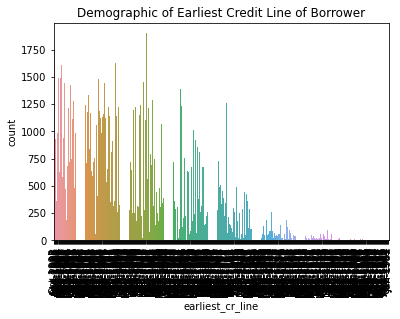

count       246269
unique         662
top       Aug-2001
freq          1901
Name: earliest_cr_line, dtype: object


In [46]:
# # Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("earliest_cr_line", "Earliest Credit Line of Borrower")

Key Points:

* Over 662 unique values.

* In regard to the present year, the top credit line is close to 20 years.

Consideration(s):

* We do need to do some data wrangling in terms of removing the month and keeping just the year.

#### Data Cleaning Earliest Credit Line

In [47]:
# removing the month from earliest_cr_line

Working_DF['earliest_cr_line'] = Working_DF['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [48]:
# Sanity checking

Working_DF.earliest_cr_line.describe()

count    246269.000000
mean       1999.164060
std           7.232946
min        1949.000000
25%        1995.000000
50%        2000.000000
75%        2004.000000
max        2015.000000
Name: earliest_cr_line, dtype: float64

### Initial Lists Status

We will explore inital list status. 

* initial_list_status: The initial listing status of the loan. Possible values are – W, F

In terms of domain knowledge I'm unfimilar with this variable, but we will look into it to come to a decision if it will be useful for us moving forward.

w    150365
f     95904
Name: initial_list_status, dtype: int64


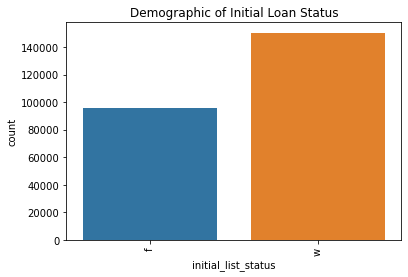

count     246269
unique         2
top            w
freq      150365
Name: initial_list_status, dtype: object


In [49]:
# # Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("initial_list_status", "Initial Loan Status")

Key Points:

* I'm unsure if this fall in the category of Note Statuses: In Funding, still receiving funding from investor or Withdrawn by Applicant, Borrower withdrew their loan application.

Consideration(s):

* I will keep this for now until for analysis purposes.

### Application Type

This section we will dive into application type.

* application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers

This is helpful to understand if borrowers are coming with as an individual or joint. In terms of understanding risk, joint applicants tend to show a high credit worthiness since it's an aggrigant of two individuals. While inidvidual applicants, for lack of a better term, have more hurdles to prove credit worthiness. 

Individual    241649
Joint App       4620
Name: application_type, dtype: int64


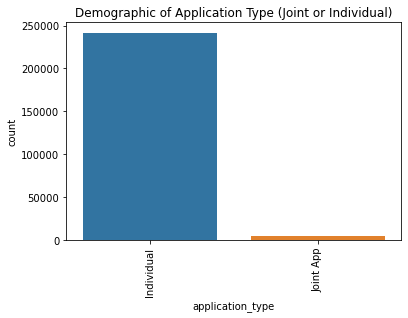

count         246269
unique             2
top       Individual
freq          241649
Name: application_type, dtype: object


In [50]:
# # Checking value count, Visual of variable distribution, and Discriptive Stats

cat_count("application_type", "Application Type (Joint or Individual)")

Key Points: 

* As expected more individual application, this could be very indicative when we look back at purpose of the loan. We saw there was a large number of debt consolidation and credit card. 

Consideration(s):

* This feature will remain as it will be useful to our model.

## Macro Validity Check of Descret Variables

In [51]:
# Checking Summary Stats for all categorical variables

categorical = Working_DF.select_dtypes('object')
categorical.describe()



,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,initial_list_status,application_type
count,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269,246269
unique,2,7,35,4,3,77,2,13,51,2,2
top,36 months,C,C1,MORTGAGE,Source Verified,Mar-2016,Fully Paid,debt_consolidation,CA,w,Individual
freq,183412,71260,15641,126956,102862,8711,197386,145597,34771,150365,241649


In [52]:
# Sorted list of categorical variables

sorted(categorical)


['addr_state',
 'application_type',
 'grade',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [53]:
# checking shape of categorical features
categorical.shape

(246269, 11)

* At this point we went from 16 categorical viables to 11

## Continuous and Numerical Variables Validity Check

In [54]:
# Creating a working variable for continuous variables (numerical)

continous = Working_DF.select_dtypes('number').head()
continous.describe()

,id,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,tot_cur_bal,bc_util,mort_acc,pub_rec_bankruptcies,tax_liens
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.00000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,4.620292e+07,16190.000000,16.616000,492.000000,4.000000,63862.000000,22.67000,1997.000000,673.00000,677.00000,0.80000,15.20000,0.200000,18752.600000,57.420000,38.200000,459.722000,193589.800000,65.040000,1.600000,0.200000,0.0
std,3.956117e+07,8119.759849,5.334658,256.180065,3.464102,23251.617578,4.73933,6.284903,14.40486,14.40486,1.30384,7.79102,0.447214,15144.788024,22.605464,12.969194,1027.969643,84796.686505,30.908704,0.894427,0.447214,0.0
min,6.728064e+06,6950.000000,11.530000,243.930000,1.000000,41810.000000,17.25000,1988.000000,660.00000,664.00000,0.00000,6.00000,0.000000,7459.000000,25.300000,22.000000,0.000000,62916.000000,27.200000,0.000000,0.000000,0.0
25%,1.073581e+07,10000.000000,12.690000,329.910000,3.000000,45000.000000,19.41000,1995.000000,665.00000,669.00000,0.00000,9.00000,0.000000,9269.000000,56.300000,28.000000,0.000000,173292.000000,39.400000,2.000000,0.000000,0.0
50%,5.110581e+07,15000.000000,15.880000,440.190000,3.000000,65000.000000,22.22000,1996.000000,665.00000,669.00000,0.00000,16.00000,0.000000,10723.000000,58.000000,43.000000,0.000000,197096.000000,71.000000,2.000000,0.000000,0.0
75%,5.922938e+07,24000.000000,17.990000,542.280000,3.000000,67500.000000,25.24000,2003.000000,680.00000,684.00000,1.00000,20.00000,0.000000,22654.000000,58.300000,44.000000,0.000000,253377.000000,89.200000,2.000000,0.000000,0.0
max,1.032155e+08,25000.000000,24.990000,903.690000,10.000000,100000.000000,29.23000,2003.000000,695.00000,699.00000,3.00000,25.00000,1.000000,43658.000000,89.200000,54.000000,2298.610000,281268.000000,98.400000,2.000000,1.000000,0.0


In [55]:
# checking all continuous variables

continous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5 non-null      int64  
 1   loan_amnt             5 non-null      float64
 2   int_rate              5 non-null      float64
 3   installment           5 non-null      float64
 4   emp_length            5 non-null      int64  
 5   annual_inc            5 non-null      float64
 6   dti                   5 non-null      float64
 7   earliest_cr_line      5 non-null      int64  
 8   fico_range_low        5 non-null      float64
 9   fico_range_high       5 non-null      float64
 10  inq_last_6mths        5 non-null      float64
 11  open_acc              5 non-null      float64
 12  pub_rec               5 non-null      float64
 13  revol_bal             5 non-null      float64
 14  revol_util            5 non-null      float64
 15  total_acc             5 non

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'earliest_cr_line'}>,
        <AxesSubplot:title={'center':'fico_range_low'}>],
       [<AxesSubplot:title={'center':'fico_range_high'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'recoveries'}>,
        <AxesSubplot:title={'center':'tot_cur_bal'}>],
       [<AxesSubplot:title={'center':'bc_uti

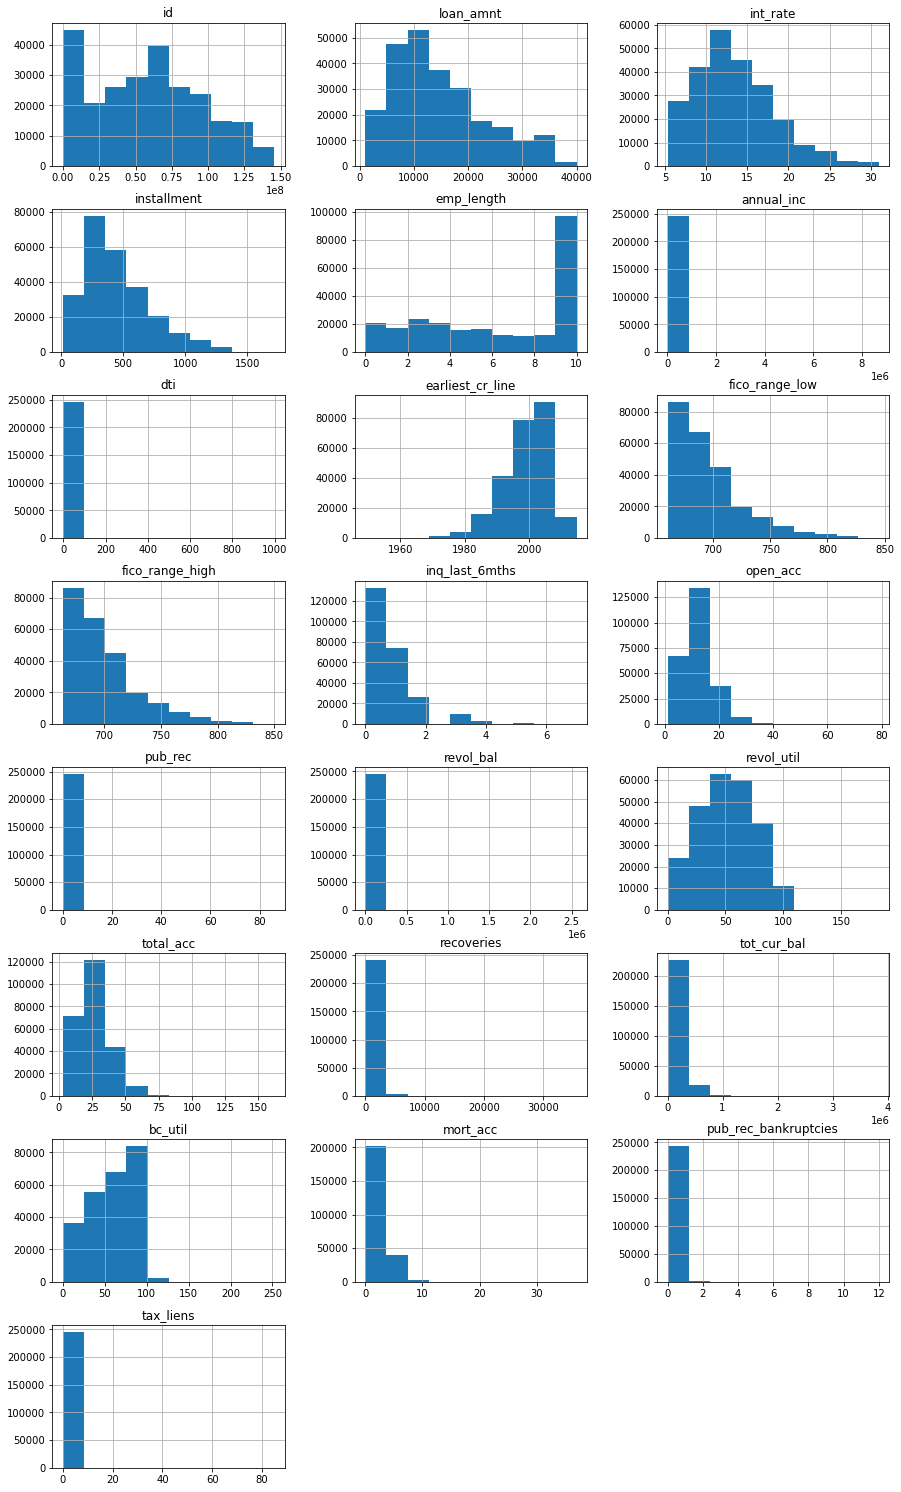

In [56]:
## Displaying historgram for all numerical columns in the asset (dataset)

Working_DF.hist(figsize=(15,30),layout=(9,3))


Plan of action for continous variables pre-analysis and cleansing:

* Based on the above display of all numerical variables within our asset, some will will require log transformation.
* Using domain knowledge we will explore and transform some continous variables
* Lastly, we will also consider which continous variables will be important to keep


#### Helper function for continous variables

In [57]:
# Creating a function to call for quick visualization of continous features within the asset


def num_count(col_name, full_name):
    """
    This function will help to plot a bar countplot for continous variables.
    - col_name: variable name within our asset.
    - full_name: the variable name that one would use for the title
    """
    # Visualize 
    plt.figure(figsize=(10,5))
    sns.distplot(Working_DF.loc[Working_DF[col_name].notnull(), col_name], kde=False).set_title('Distribution of ' + full_name)
    plt.xticks(rotation=90, horizontalalignment='center')
    plt.show()
    
    #box plot
    plt.figure(figsize=(10,5))
    plt.ylabel(full_name)
    sns.boxplot(x=Working_DF[col_name])
    plt.show()
    
    # Descriptive stats
    print(Working_DF[col_name].describe())

### ID

ID is the assigned ID for the loan listing.

This is not of key importance so we shall remove it from our features within our asset.

In [58]:
# Removing id from features within the asset

Working_DF.drop('id', axis=1, inplace=True)

In [59]:
# sanity check

Working_DF.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'recoveries', 'application_type',
       'tot_cur_bal', 'bc_util', 'mort_acc', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [60]:
#checking the shape

Working_DF.shape

(246269, 32)

### Loan Amount

Loan amount is defined as: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

* This shows use the distribution of loan amount amoung our current data asset

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


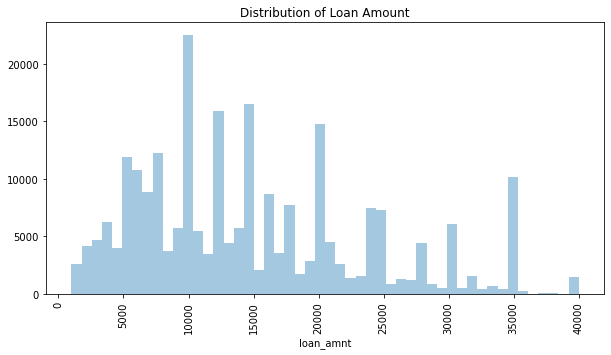

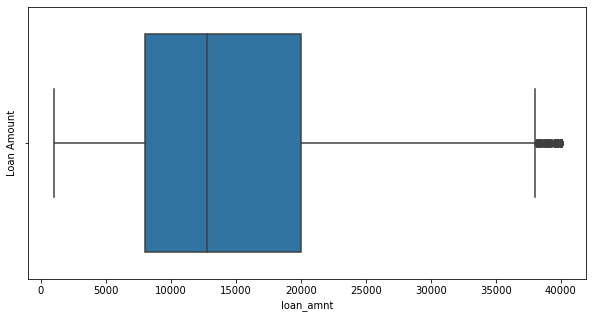

count    246269.000000
mean      14843.904734
std        8792.352950
min        1000.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


In [61]:
# Visual of distribution and dicriptive stats

num_count('loan_amnt', "Loan Amount")

Key Points:

* Loan amount, minimun is 1000 and max is 40k.

* Also we can see between 10k-23k is the range that most borrowers need a loan amount.

* In consideration from our earlier analysis of categorical features we can infer that this could again fall into the purposes of debt consolidation and credit card


### Interest Rate

The interest rate is given based one the loan. 

* This is also determined by FICO score history, credit worthiness, and other factors that are calaculated based on the borrowers risk profile.

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


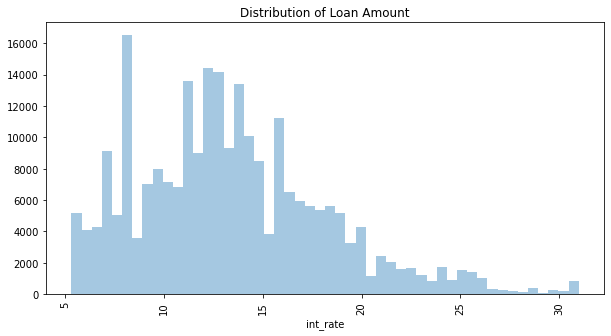

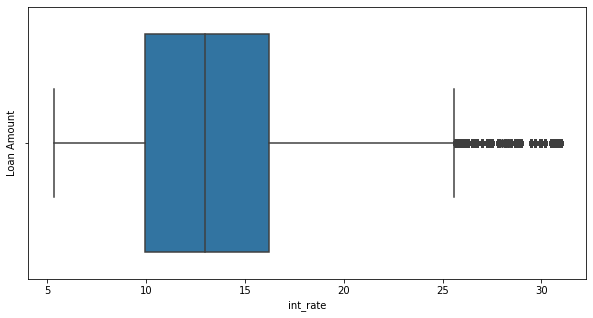

count    246269.000000
mean         13.388010
std           4.820638
min           5.310000
25%           9.920000
50%          12.990000
75%          16.200000
max          30.990000
Name: int_rate, dtype: float64


In [62]:
# Visual of distribution and dicriptive stats

num_count('int_rate', "Loan Amount")

Key points:

* Borrowers fall within the 10-16 intereste rate for the loan.
* We do have some that excede the typical 24/25 range however, these outliers could have been considered on other factors.


### Installment

Installment(s): The monthly payment owed by the borrower if the loan originates.

* One conisderation is that this may not be initally helpful as this is a bit unclear if this is a pre-application or post-loan approval feature.

We will explore and come to decision based on the analysis below.

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


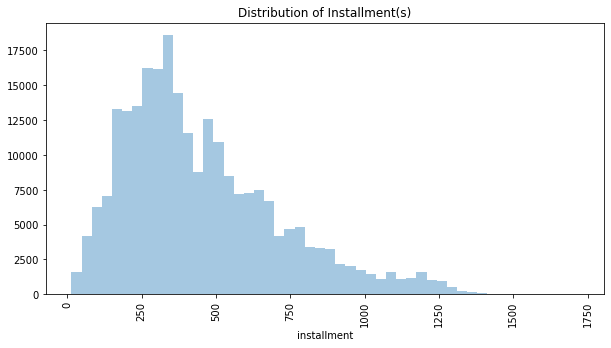

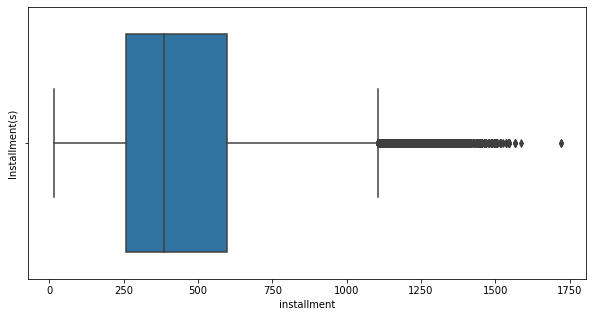

count    246269.000000
mean        450.067854
std         263.773444
min          14.010000
25%         258.450000
50%         385.800000
75%         597.060000
max        1719.830000
Name: installment, dtype: float64


In [63]:
# Visual of distribution and dicriptive stats

num_count('installment', "Installment(s)")

Key Point:

* This seems to be installments based on the term per further inspection and domain knowledge.

Consideration(s):

* We will keep this for now to see the relationship to our response variable.

### Anaual Income

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


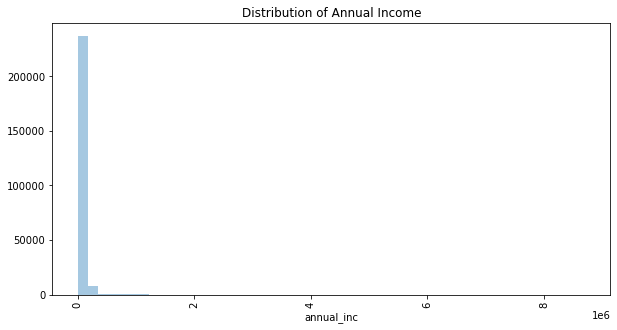

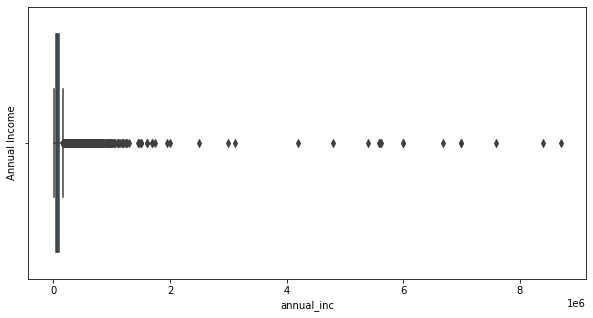

count    2.462690e+05
mean     7.952875e+04
std      7.269803e+04
min      2.400000e+03
25%      4.975000e+04
50%      6.800000e+04
75%      9.500000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64


In [64]:
# Visual of distribution and dicriptive stats

num_count('annual_inc', "Annual Income")

* Based on the figures above we will apply some log transformation to see the and this will be a new feature we will include in our asset

#### Log transformation and Feature Engineering for Anual Income

In [65]:
# Adding new feature called 'anual_inc_log'

Working_DF['annual_inc_log'] = Working_DF['annual_inc'].apply(np.log)

#### Anaual Income Log analysis

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


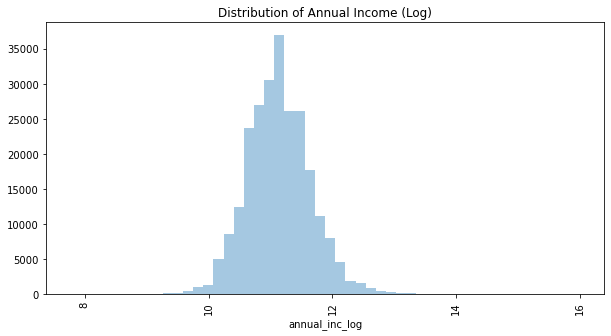

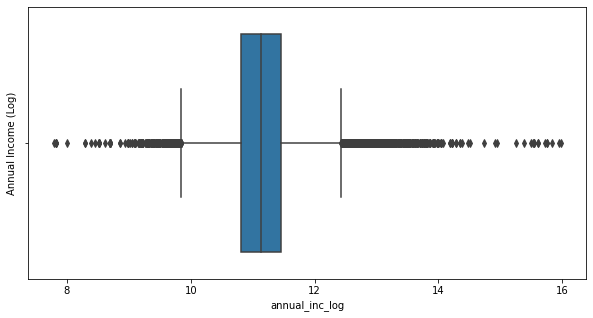

count    246269.000000
mean         11.136883
std           0.514487
min           7.783224
25%          10.814766
50%          11.127263
75%          11.461632
max          15.979590
Name: annual_inc_log, dtype: float64


In [66]:
num_count('annual_inc_log', "Annual Income (Log)")

Key Point:

* Median anual income is around 63k

* We created a log feature for anual income 

### Debt-to- Income Ratio

Debt-to-income ration is, a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

* Domain knowledge dti, should be smaller than 36%, with no more than 28% of that debt going towards servicing your mortgage. 

In [67]:
# checking stats
Working_DF.dti.describe()

count    246269.000000
mean         18.656221
std           9.242997
min          -1.000000
25%          12.370000
50%          18.070000
75%          24.430000
max         999.000000
Name: dti, dtype: float64

Ket Points:

* We see some extreme values like -1 and 999

Consideration:

* Taking into account some domain knowledge we will create a historgram this time with a ratio less than 60

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

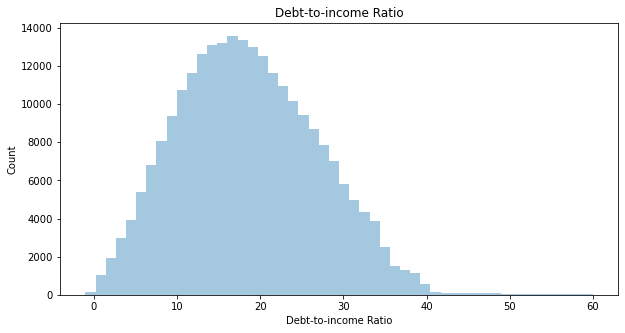

In [68]:
# creating historgram

plt.figure(figsize=(10,5))
sns.distplot(Working_DF.loc[Working_DF['dti']<60, 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

Key takeaway we see in dti it falled between over 10-roughly 28, with a few outlers over 40 dti.

### FICO Score (High and Low Range)

The FICO score is a very huge factor in any type of application of financial lending products be it--student loans, private loans, mortagages, and credit cards.

* fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to.
* fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to.

A pre-analysis assumption would be that this will be aggregated into one new feature called fico_agg

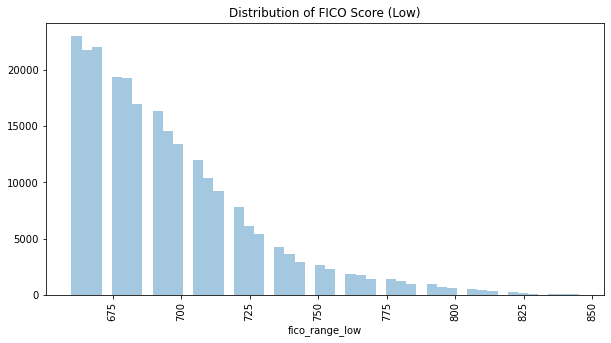

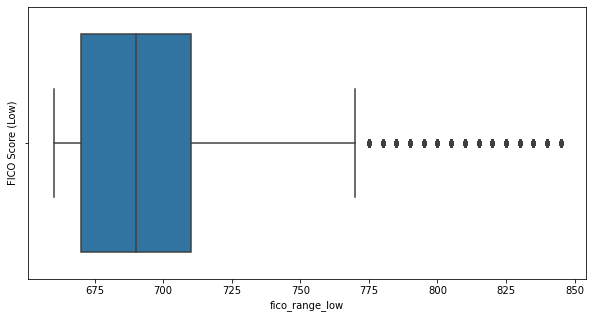

count    246269.000000
mean        695.060462
std          31.010929
min         660.000000
25%         670.000000
50%         690.000000
75%         710.000000
max         845.000000
Name: fico_range_low, dtype: float64


In [69]:
# Visual of distribution and dicriptive stats

num_count('fico_range_low', "FICO Score (Low)")

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


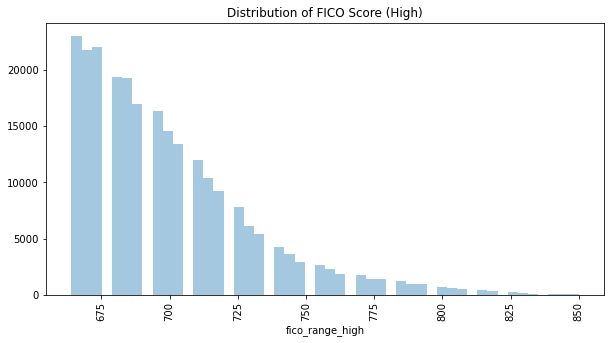

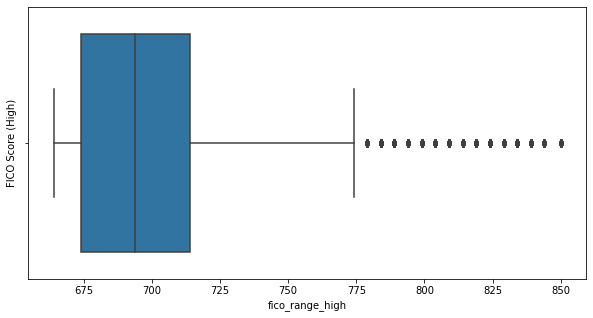

count    246269.000000
mean        699.060564
std          31.011422
min         664.000000
25%         674.000000
50%         694.000000
75%         714.000000
max         850.000000
Name: fico_range_high, dtype: float64


In [70]:
# Visual of distribution and dicriptive stats

num_count('fico_range_high', "FICO Score (High)")

In [71]:
### Checking correlation

Working_DF[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


Consideration(s):

* Both Fico features can be aggreated into one score 

* Both are also highly correlated 

#### Clensing and Feature Engineering FICO Score(s)

In [72]:
# aggregating FICO features

Working_DF['fico_score'] = 0.5 * Working_DF['fico_range_low'] + 0.5 * Working_DF['fico_range_high']

In [73]:
# Removing the two original FICO features

Working_DF.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

In [74]:
# Sanity check
Working_DF.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'recoveries', 'application_type', 'tot_cur_bal', 'bc_util', 'mort_acc',
       'pub_rec_bankruptcies', 'tax_liens', 'annual_inc_log', 'fico_score'],
      dtype='object')

In [75]:
# Checking shape
Working_DF.shape

(246269, 32)

### Inquiries (within last six months)

This section will look into inquires within the last six months.

* inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


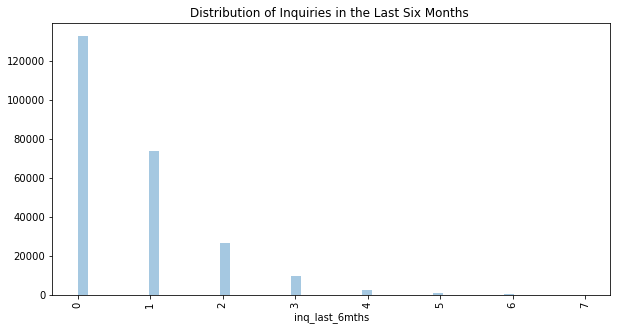

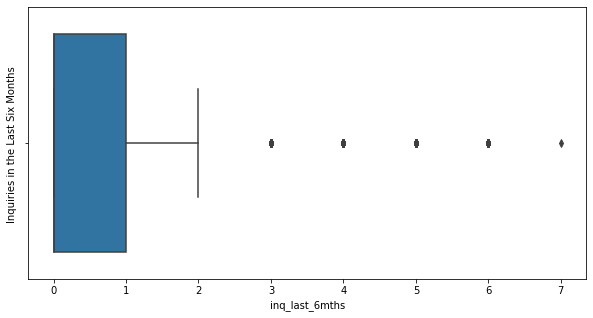

count    246269.000000
mean          0.689693
std           0.927710
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: inq_last_6mths, dtype: float64


In [76]:
# Visual of distribution and dicriptive stats

num_count('inq_last_6mths', "Inquiries in the Last Six Months ")

Key Points:

* looking into the data above, inquires do play a role in the application process. Especially,if they were considered a lot based on the risk profile of the lender. 

Consideration(s):

* However, just like inq_last_12mnths, this may not be useful and we will drop this fround our variable list within the asset

#### Clensing Inquiries from our variable features

In [77]:
# removing from the asset

Working_DF.drop(['inq_last_6mths'], axis=1, inplace=True)

In [78]:
# Sanity check

Working_DF.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'recoveries', 'application_type',
       'tot_cur_bal', 'bc_util', 'mort_acc', 'pub_rec_bankruptcies',
       'tax_liens', 'annual_inc_log', 'fico_score'],
      dtype='object')

In [79]:
# checking shape

Working_DF.shape

(246269, 31)

### Open Accounts

Open accounts are the number of credit lines.

* open_acc: The number of open credit lines in the borrower's credit file.

This is another important feature based on domain knowledge, as this shows the number of open credit lines a borrower has. Also, this also shows potenital credit worthiness--in respect to credit lenders (credit cards)

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


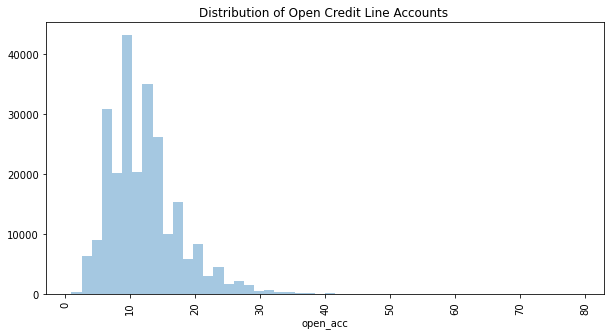

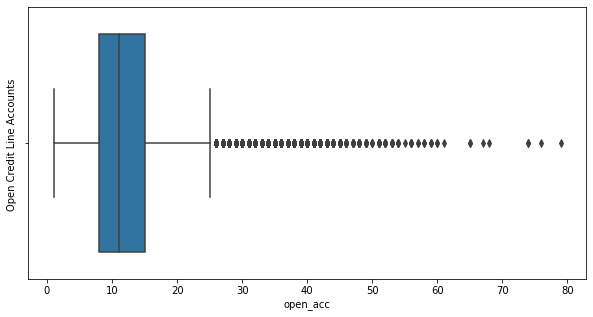

count    246269.000000
mean         12.162428
std           5.549445
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          79.000000
Name: open_acc, dtype: float64


In [80]:
# Visual of distribution and dicriptive stats

num_count('open_acc', "Open Credit Line Accounts ")

Key Points:

* Average is 12 open credit lines.

Consideration(s):

* This will be helpful when we do the bivariant analysis of this feature to our response variable

### Mid Continous Validity Check

Based on further domain research and to save time on feature analysis the following will be removed:

* total_acc: The total number of credit lines currently in the borrower's credit file. WE already have open credit lines.


* recoveries:post charge off gross recovery. This is for the post charge-off/default process for reconciliation purposes.


* bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts. Unnecessary as we have a DTI ratio to help understand the debt risk of the borrower. 


* tax_liens: Number of tax liens. This could be useful, however, we this can be used for further analysis at a later iteration of this initiative. 

In [81]:
# Removing the features listed above

Working_DF.drop(['total_acc', 'recoveries', 'bc_util', 'tax_liens'], axis=1, inplace=True)

In [82]:
# Sanity check
Working_DF.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'application_type', 'tot_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'annual_inc_log', 'fico_score'],
      dtype='object')

In [83]:
# checking shape

Working_DF.shape

(246269, 27)

In [84]:
#checking current cont variables

continous = Working_DF.select_dtypes('number').head()
continous.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,tot_cur_bal,mort_acc,pub_rec_bankruptcies,annual_inc_log,fico_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,16190.000000,16.616000,492.000000,4.000000,63862.000000,22.67000,1997.000000,15.20000,0.200000,18752.600000,57.420000,193589.800000,1.600000,0.200000,11.014052,675.00000
std,8119.759849,5.334658,256.180065,3.464102,23251.617578,4.73933,6.284903,7.79102,0.447214,15144.788024,22.605464,84796.686505,0.894427,0.447214,0.351334,14.40486
min,6950.000000,11.530000,243.930000,1.000000,41810.000000,17.25000,1988.000000,6.00000,0.000000,7459.000000,25.300000,62916.000000,0.000000,0.000000,10.640891,662.00000
25%,10000.000000,12.690000,329.910000,3.000000,45000.000000,19.41000,1995.000000,9.00000,0.000000,9269.000000,56.300000,173292.000000,2.000000,0.000000,10.714418,667.00000
50%,15000.000000,15.880000,440.190000,3.000000,65000.000000,22.22000,1996.000000,16.00000,0.000000,10723.000000,58.000000,197096.000000,2.000000,0.000000,11.082143,667.00000
75%,24000.000000,17.990000,542.280000,3.000000,67500.000000,25.24000,2003.000000,20.00000,0.000000,22654.000000,58.300000,253377.000000,2.000000,0.000000,11.119883,682.00000
max,25000.000000,24.990000,903.690000,10.000000,100000.000000,29.23000,2003.000000,25.00000,1.000000,43658.000000,89.200000,281268.000000,2.000000,1.000000,11.512925,697.00000


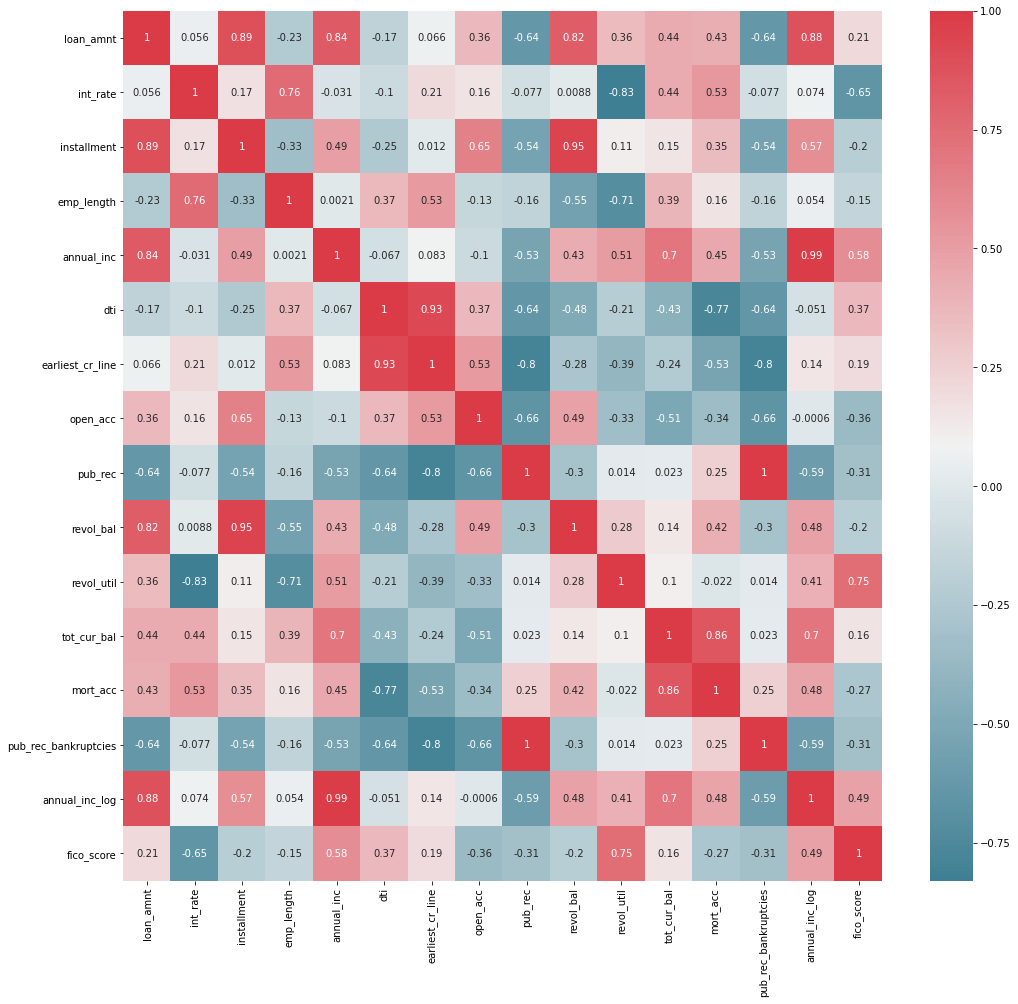

In [85]:
# checking correlation

def correlation_heatmap(df1):
   _,ax=plt.subplots(figsize=(17,16))
   colormap=sns.diverging_palette(220,10,as_cmap=True)
   sns.heatmap(continous.corr(),annot=True,cmap=colormap)
   
correlation_heatmap(continous)

In [88]:
continous = Working_DF.select_dtypes('number').head()
continous.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,tot_cur_bal,mort_acc,pub_rec_bankruptcies,annual_inc_log,fico_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,16190.000000,16.616000,492.000000,4.000000,63862.000000,22.67000,1997.000000,15.20000,0.200000,18752.600000,57.420000,193589.800000,1.600000,0.200000,11.014052,675.00000
std,8119.759849,5.334658,256.180065,3.464102,23251.617578,4.73933,6.284903,7.79102,0.447214,15144.788024,22.605464,84796.686505,0.894427,0.447214,0.351334,14.40486
min,6950.000000,11.530000,243.930000,1.000000,41810.000000,17.25000,1988.000000,6.00000,0.000000,7459.000000,25.300000,62916.000000,0.000000,0.000000,10.640891,662.00000
25%,10000.000000,12.690000,329.910000,3.000000,45000.000000,19.41000,1995.000000,9.00000,0.000000,9269.000000,56.300000,173292.000000,2.000000,0.000000,10.714418,667.00000
50%,15000.000000,15.880000,440.190000,3.000000,65000.000000,22.22000,1996.000000,16.00000,0.000000,10723.000000,58.000000,197096.000000,2.000000,0.000000,11.082143,667.00000
75%,24000.000000,17.990000,542.280000,3.000000,67500.000000,25.24000,2003.000000,20.00000,0.000000,22654.000000,58.300000,253377.000000,2.000000,0.000000,11.119883,682.00000
max,25000.000000,24.990000,903.690000,10.000000,100000.000000,29.23000,2003.000000,25.00000,1.000000,43658.000000,89.200000,281268.000000,2.000000,1.000000,11.512925,697.00000


In [89]:
continous.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'tot_cur_bal', 'mort_acc', 'pub_rec_bankruptcies',
       'annual_inc_log', 'fico_score'],
      dtype='object')

In [90]:
 Working_DF.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'application_type', 'tot_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'annual_inc_log', 'fico_score'],
      dtype='object')

### Updating Current Asset (dataset) into a CSV

In [91]:
# creating a csv

Working_DF.to_csv("clean_accepted_3.csv", index=False)

## Notebook Summary

Due to the sheer volume of features and the amount of time taken, it would be safe to move towards bivariant EDA and preprocessing. An extensive univariant analysis has been done and also some reduction within the variable-feature space. Additionally, some feature engineers has be done. In "EDA2_PreProcessing" we will begin bivariant analysis and pre-processing of the the new asset (updated dataset, "clean_accepted_3.csv"). 